In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [177]:
df = pd.read_csv("raw_data/serie_historica_acumulados.csv", encoding= 'unicode_escape')
df

CCAA      FECHA  CASOS  \
0                                                    AN  20/2/2020    NaN   
1                                                    AR  20/2/2020    NaN   
2                                                    AS  20/2/2020    NaN   
3                                                    IB  20/2/2020    1.0   
4                                                    CN  20/2/2020    1.0   
...                                                 ...        ...    ...   
1312  Los datos de estas comunidades son datos de pr...        NaN    NaN   
1313  * Desde el día 11/04/2020 las cifras de hospit...        NaN    NaN   
1314  * Desde el día 12/04/2020 las cifras de UCIs d...        NaN    NaN   
1315  * Desde el día 26/04/2020 las cifras de Hospit...        NaN    NaN   
1316  NOTA2:Se excluyen de la serie las notificacion...        NaN    NaN   

      PCR+  TestAc+  Hospitalizados  UCI  Fallecidos  Recuperados  
0      NaN      NaN             NaN  NaN         NaN          NaN  
1      NaN      NaN             NaN  NaN         NaN          NaN  
2      NaN      NaN             NaN  NaN         NaN          NaN  
3      NaN      NaN             NaN  NaN         NaN          NaN  
4      NaN      NaN             NaN  NaN         NaN          NaN  
...    ...      ...             ...  ...         ...          ...  
1312   NaN      NaN             NaN  NaN         NaN          NaN  
1313   NaN      NaN             NaN  NaN         NaN          NaN  
1314   NaN      NaN             NaN  NaN         NaN          NaN  
1315   NaN      NaN             NaN  NaN         NaN          NaN  
1316   NaN      NaN             NaN  NaN         NaN          NaN  

[1317 rows x 9 columns]

In [178]:
df.tail(10)

CCAA      FECHA  CASOS  \
1307                                                 MC  28/4/2020    NaN   
1308                                                 NC  28/4/2020    NaN   
1309                                                 PV  28/4/2020    NaN   
1310                                                 RI  28/4/2020    NaN   
1311  NOTA: El objetivo de los datos que se publican...        NaN    NaN   
1312  Los datos de estas comunidades son datos de pr...        NaN    NaN   
1313  * Desde el día 11/04/2020 las cifras de hospit...        NaN    NaN   
1314  * Desde el día 12/04/2020 las cifras de UCIs d...        NaN    NaN   
1315  * Desde el día 26/04/2020 las cifras de Hospit...        NaN    NaN   
1316  NOTA2:Se excluyen de la serie las notificacion...        NaN    NaN   

         PCR+  TestAc+  Hospitalizados    UCI  Fallecidos  Recuperados  
1307   1480.0    360.0           635.0  106.0       130.0       1153.0  
1308   4794.0   1090.0          1951.0  130.0       448.0       2082.0  
1309  12619.0   2519.0          6522.0  540.0      1274.0      10474.0  
1310   3910.0   1263.0          1413.0   87.0       330.0       2091.0  
1311      NaN      NaN             NaN    NaN         NaN          NaN  
1312      NaN      NaN             NaN    NaN         NaN          NaN  
1313      NaN      NaN             NaN    NaN         NaN          NaN  
1314      NaN      NaN             NaN    NaN         NaN          NaN  
1315      NaN      NaN             NaN    NaN         NaN          NaN  
1316      NaN      NaN             NaN    NaN         NaN          NaN

In [179]:
#Drop the comment columns
df = df.drop([1311,1312,1313,1314,1315,1316],axis=0)

In [180]:
df.tail(5)

CCAA      FECHA  CASOS     PCR+  TestAc+  Hospitalizados    UCI  \
1306   ML  28/4/2020    NaN    114.0     11.0            44.0    3.0   
1307   MC  28/4/2020    NaN   1480.0    360.0           635.0  106.0   
1308   NC  28/4/2020    NaN   4794.0   1090.0          1951.0  130.0   
1309   PV  28/4/2020    NaN  12619.0   2519.0          6522.0  540.0   
1310   RI  28/4/2020    NaN   3910.0   1263.0          1413.0   87.0   

      Fallecidos  Recuperados  
1306         2.0         95.0  
1307       130.0       1153.0  
1308       448.0       2082.0  
1309      1274.0      10474.0  
1310       330.0       2091.0

In [181]:
#Replace all NaN elements with 0s.
df = df.fillna(0)

In [182]:
df.CCAA.value_counts()

EX    69
MC    69
NC    69
AR    69
RI    69
CM    69
AN    69
CB    69
PV    69
MD    69
CN    69
IB    69
AS    69
CL    69
CT    69
ML    69
GA    69
CE    69
VC    69
Name: CCAA, dtype: int64

In [183]:
df.CCAA.value_counts().value_counts()

69    19
Name: CCAA, dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1310
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CCAA            1311 non-null   object 
 1   FECHA           1311 non-null   object 
 2   CASOS           1311 non-null   float64
 3   PCR+            1311 non-null   float64
 4   TestAc+         1311 non-null   float64
 5   Hospitalizados  1311 non-null   float64
 6   UCI             1311 non-null   float64
 7   Fallecidos      1311 non-null   float64
 8   Recuperados     1311 non-null   float64
dtypes: float64(7), object(2)
memory usage: 102.4+ KB


In [185]:
ccaa = {
    'EX':'Extremadura',
    'MC':'Murcia',
    'NC':'Navarra',
    'AR':'Aragón',
    'RI':'Rioja',
    'CM':'Castilla-La Mancha',
    'AN':'Andalucia',
    'CB':'Cantabria',
    'PV':'País Vasco',
    'MD':'Madrid',
    'CN':'Canarias',
    'IB':'Islas Baleares',
    'AS':'Asturias',
    'CL':'Castilla y León',
    'CT':'Cataluña',
    'ML':'Melilla',
    'GA':'Galicia',
    'CE':'Ceuta',
    'VC':'Valencia',   
}

In [186]:
df_ccaa = pd.DataFrame([[key, ccaa[key]] for key in ccaa.keys()], columns=['abr', 'ccaa'])

In [187]:
df_ccaa = df_ccaa.sort_values('ccaa').reset_index(drop=True)

In [188]:
df_ccaa

abr                ccaa
0   AN           Andalucia
1   AR              Aragón
2   AS            Asturias
3   CN            Canarias
4   CB           Cantabria
5   CL     Castilla y León
6   CM  Castilla-La Mancha
7   CT            Cataluña
8   CE               Ceuta
9   EX         Extremadura
10  GA             Galicia
11  IB      Islas Baleares
12  MD              Madrid
13  ML             Melilla
14  MC              Murcia
15  NC             Navarra
16  PV          País Vasco
17  RI               Rioja
18  VC            Valencia

In [189]:
df

CCAA      FECHA  CASOS     PCR+  TestAc+  Hospitalizados    UCI  \
0      AN  20/2/2020    0.0      0.0      0.0             0.0    0.0   
1      AR  20/2/2020    0.0      0.0      0.0             0.0    0.0   
2      AS  20/2/2020    0.0      0.0      0.0             0.0    0.0   
3      IB  20/2/2020    1.0      0.0      0.0             0.0    0.0   
4      CN  20/2/2020    1.0      0.0      0.0             0.0    0.0   
...   ...        ...    ...      ...      ...             ...    ...   
1306   ML  28/4/2020    0.0    114.0     11.0            44.0    3.0   
1307   MC  28/4/2020    0.0   1480.0    360.0           635.0  106.0   
1308   NC  28/4/2020    0.0   4794.0   1090.0          1951.0  130.0   
1309   PV  28/4/2020    0.0  12619.0   2519.0          6522.0  540.0   
1310   RI  28/4/2020    0.0   3910.0   1263.0          1413.0   87.0   

      Fallecidos  Recuperados  
0            0.0          0.0  
1            0.0          0.0  
2            0.0          0.0  
3            0.0          0.0  
4            0.0          0.0  
...          ...          ...  
1306         2.0         95.0  
1307       130.0       1153.0  
1308       448.0       2082.0  
1309      1274.0      10474.0  
1310       330.0       2091.0  

[1311 rows x 9 columns]

In [190]:
def giveMeCCAA(df_ccaa, df):
    name_ccaa = []
    for i in df.CCAA:
        for ind,e in enumerate(df_ccaa.abr):
            if i == e:
                name_ccaa.append(df_ccaa.ccaa[ind])
    return name_ccaa

In [191]:
name_ccaa = giveMeCCAA(df_ccaa,df)

In [192]:
df["name"]=name_ccaa

In [193]:
df

CCAA      FECHA  CASOS     PCR+  TestAc+  Hospitalizados    UCI  \
0      AN  20/2/2020    0.0      0.0      0.0             0.0    0.0   
1      AR  20/2/2020    0.0      0.0      0.0             0.0    0.0   
2      AS  20/2/2020    0.0      0.0      0.0             0.0    0.0   
3      IB  20/2/2020    1.0      0.0      0.0             0.0    0.0   
4      CN  20/2/2020    1.0      0.0      0.0             0.0    0.0   
...   ...        ...    ...      ...      ...             ...    ...   
1306   ML  28/4/2020    0.0    114.0     11.0            44.0    3.0   
1307   MC  28/4/2020    0.0   1480.0    360.0           635.0  106.0   
1308   NC  28/4/2020    0.0   4794.0   1090.0          1951.0  130.0   
1309   PV  28/4/2020    0.0  12619.0   2519.0          6522.0  540.0   
1310   RI  28/4/2020    0.0   3910.0   1263.0          1413.0   87.0   

      Fallecidos  Recuperados            name  
0            0.0          0.0       Andalucia  
1            0.0          0.0          Aragón  
2            0.0          0.0        Asturias  
3            0.0          0.0  Islas Baleares  
4            0.0          0.0        Canarias  
...          ...          ...             ...  
1306         2.0         95.0         Melilla  
1307       130.0       1153.0          Murcia  
1308       448.0       2082.0         Navarra  
1309      1274.0      10474.0      País Vasco  
1310       330.0       2091.0           Rioja  

[1311 rows x 10 columns]

In [276]:
dates = df.FECHA
dates = dates.to_list()

In [277]:
def obtainDate(lst):

    date = []
    for i in lst:
        t = i.split("/")
        for elem in range(2):
            t[elem] = t[elem].zfill(2)
        res=t[2]+"-"+t[1]+"-"+t[0]
        date.append(res)

    return date

In [278]:
new_date = obtainDate(dates)

In [279]:
new_date.sort()

In [281]:
df['date'] = new_date

/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [282]:
col_order = ['FECHA','date','name','CASOS','PCR+','TestAc+','Hospitalizados','UCI','Fallecidos','Recuperados']
df = df[col_order]

In [283]:
df

FECHA        date            name  CASOS     PCR+  TestAc+  \
0     20/2/2020  2020-02-20       Andalucia    0.0      0.0      0.0   
1     20/2/2020  2020-02-20          Aragón    0.0      0.0      0.0   
2     20/2/2020  2020-02-20        Asturias    0.0      0.0      0.0   
3     20/2/2020  2020-02-20  Islas Baleares    1.0      0.0      0.0   
4     20/2/2020  2020-02-20        Canarias    1.0      0.0      0.0   
...         ...         ...             ...    ...      ...      ...   
1306  28/4/2020  2020-04-28         Melilla    0.0    114.0     11.0   
1307  28/4/2020  2020-04-28          Murcia    0.0   1480.0    360.0   
1308  28/4/2020  2020-04-28         Navarra    0.0   4794.0   1090.0   
1309  28/4/2020  2020-04-28      País Vasco    0.0  12619.0   2519.0   
1310  28/4/2020  2020-04-28           Rioja    0.0   3910.0   1263.0   

      Hospitalizados    UCI  Fallecidos  Recuperados  
0                0.0    0.0         0.0          0.0  
1                0.0    0.0         0.0          0.0  
2                0.0    0.0         0.0          0.0  
3                0.0    0.0         0.0          0.0  
4                0.0    0.0         0.0          0.0  
...              ...    ...         ...          ...  
1306            44.0    3.0         2.0         95.0  
1307           635.0  106.0       130.0       1153.0  
1308          1951.0  130.0       448.0       2082.0  
1309          6522.0  540.0      1274.0      10474.0  
1310          1413.0   87.0       330.0       2091.0  

[1311 rows x 10 columns]

In [291]:
dates_sort = df.FECHA.sort_values(ascending=True)
dates_sort = dates_sort.to_list()
dates_sort = list(dict.fromkeys(dates_sort))
dates_sort = sorted(dates_sort)
len(dates_sort)

69

In [292]:
dates_sort = obtainDate(dates_sort)

In [293]:
dates_sort.sort()

In [294]:
len(dates_sort)

69

<BarContainer object of 19 artists>

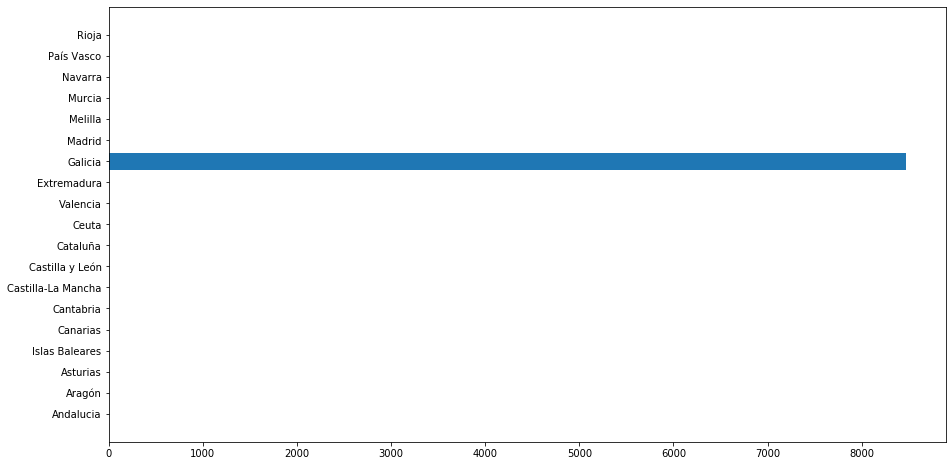

In [114]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df_Casos_20abr['name'], df_Casos_20abr['CASOS'])

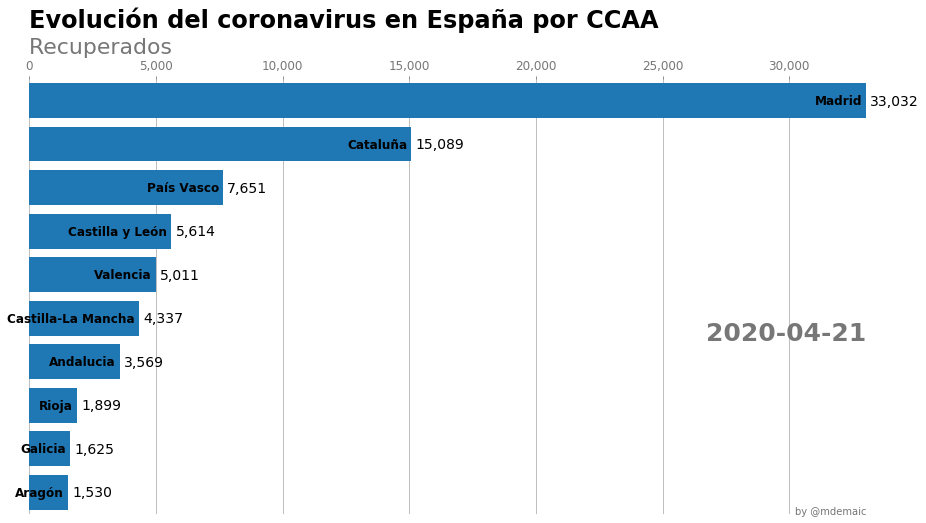

In [302]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(date,df,col):
    
    dff = df[df['date'].eq(date)].sort_values(by=col, ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff[col]) #, color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff[col].max() / 200
    
    for i, (value, name) in enumerate(zip(dff[col], dff['name'])):
        ax.text(value-dx, i,     name,           size=12, weight=600, ha='right', va='center')
        ax.text(value+dx, i,     f"{value:,.0f}",  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=25, ha='right', weight=800)
    ax.text(0, 1.06, col, transform=ax.transAxes, size=22, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Evolución del coronavirus en España por CCAA',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @mdemaic', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart('2020-04-21',df,'Recuperados')
      

def draw_barchart_Casos(date):
    draw_barchart(date,df,"CASOS")
    
def draw_barchart_PCR(date):
    draw_barchart(date,df,"PCR+")

def draw_barchart_TestAc(date):
    draw_barchart(date,df,"TestAc+")
    
def draw_barchart_Hospitalizados(date):
    draw_barchart(date,df,"Hospitalizados")
    
def draw_barchart_UCI(date):
    draw_barchart(date,df,"UCI")
    
def draw_barchart_Fallecidos(date):
    draw_barchart(date,df,"Fallecidos")
    
def draw_barchart_Recuperados(date):
    draw_barchart(date,df,"Recuperados")


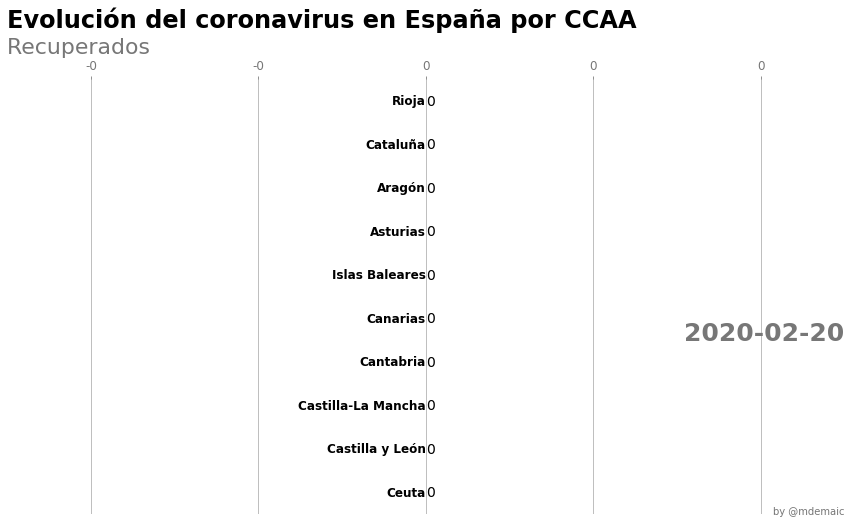

In [299]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_Recuperados, frames=dates_sort)
HTML(animator.to_jshtml())

In [300]:
def draw_barchart_PCR(date):
    draw_barchart(date,df,"PCR+")

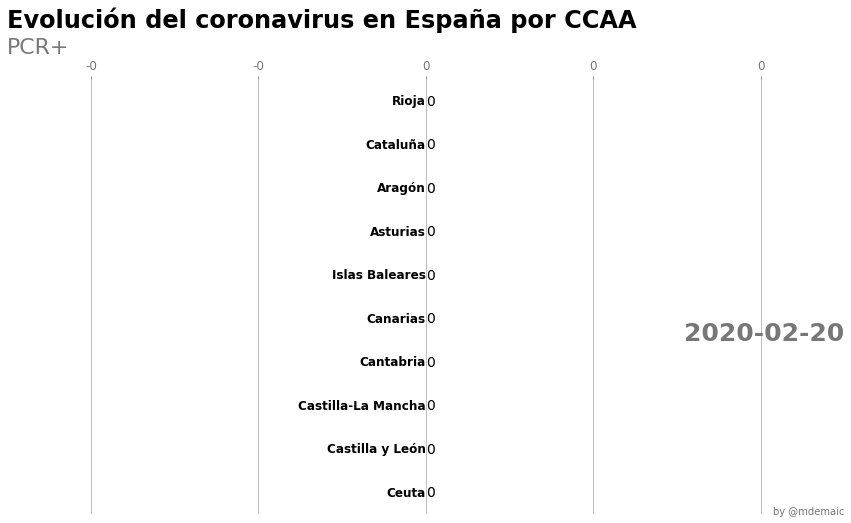

In [301]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_PCR, frames=dates_sort)
HTML(animator.to_jshtml())

In [95]:
col_Casos = ['date','name','CASOS']
col_PCR = ['date','name','PCR+']
col_TestAc = ['date','name','TestAc+']
col_Hospitalizados = ['date','name','Hospitalizados']
col_UCI = ['date','name','UCI']
col_Fallecidos = ['date','name','Fallecidos']
col_Recuperados = ['date','name','Recuperados']

df_Casos = df[col_Casos]
df_PCR = df[col_PCR]
df_TestAc = df[col_TestAc]
df_Hospitalizados = df[col_Hospitalizados]
df_UCI = df[col_UCI]
df_Fallecidos = df[col_Fallecidos]
df_Recuperados = df[col_Recuperados]

In [96]:
df_Casos

date            name  CASOS
0    2020-02-20       Andalucia    0.0
1    2020-02-20          Aragón    0.0
2    2020-02-20        Asturias    0.0
3    2020-02-20  Islas Baleares    1.0
4    2020-02-20        Canarias    1.0
...         ...             ...    ...
1306 2020-04-28         Melilla    0.0
1307 2020-04-28          Murcia    0.0
1308 2020-04-28         Navarra    0.0
1309 2020-04-28      País Vasco    0.0
1310 2020-04-28           Rioja    0.0

[1311 rows x 3 columns]

In [104]:
df_Casos_20abr = df_Casos[df_Casos.date == "2020-04-20"]

In [105]:
df_Casos_20abr

date                name   CASOS
1140 2020-04-20           Andalucia     0.0
1141 2020-04-20              Aragón     0.0
1142 2020-04-20            Asturias     0.0
1143 2020-04-20      Islas Baleares     0.0
1144 2020-04-20            Canarias     0.0
1145 2020-04-20           Cantabria     0.0
1146 2020-04-20  Castilla-La Mancha     0.0
1147 2020-04-20     Castilla y León     0.0
1148 2020-04-20            Cataluña     0.0
1149 2020-04-20               Ceuta     0.0
1150 2020-04-20            Valencia     0.0
1151 2020-04-20         Extremadura     0.0
1152 2020-04-20             Galicia  8468.0
1153 2020-04-20              Madrid     0.0
1154 2020-04-20             Melilla     0.0
1155 2020-04-20              Murcia     0.0
1156 2020-04-20             Navarra     0.0
1157 2020-04-20          País Vasco     0.0
1158 2020-04-20               Rioja     0.0

In [106]:
Casos = pd.pivot_table(df_Casos, values='CASOS', index='date',
                    columns=['name'], aggfunc=np.sum, fill_value=0)

In [107]:
Casos

name        Andalucia  Aragón  Asturias  Canarias  Cantabria  Castilla y León  \
date                                                                            
2020-01-03         12       0         1         7         10                2   
2020-01-04       6972    2700      1384      1444       1268             7355   
2020-02-03         12       0         1         7         10                7   
2020-02-04       7374    2889      1433      1490       1321             7875   
2020-02-20          0       0         0         1          0                0   
...               ...     ...       ...       ...        ...              ...   
2020-10-04       9712    3969      1827      1887       1719            11543   
2020-11-03        115      64        47        51         16               71   
2020-11-04      10006    4070      1892      1918       1752            12118   
2020-12-03        219      80        67        70         29               92   
2020-12-04      10095    4187      1958      1944       1777            12628   

name        Castilla-La Mancha  Cataluña  Ceuta  Extremadura  Galicia  \
date                                                                    
2020-01-03                   3        15      0            6        0   
2020-01-04                7682     21804     55         1837     4842   
2020-02-03                   7        15      0            6        0   
2020-02-04                8523     23460     62         1893     5219   
2020-02-20                   0         0      0            0        0   
...                        ...       ...    ...          ...      ...   
2020-10-04               13456     32984     93         2486     7176   
2020-11-03                 115       202      0           19       35   
2020-11-04               13698     34027     93         2580     7336   
2020-12-03                 194       349      0           39       85   
2020-12-04               14054     34726     95         2658     7494   

name        Islas Baleares  Madrid  Melilla  Murcia  Navarra  País Vasco  \
date                                                                       
2020-01-03               2      29        0       0        1           9   
2020-01-04            1204   32155       62    1084     2682        7317   
2020-02-03               2      49        0       0        1          13   
2020-02-04            1257   34188       70    1145     2836        7827   
2020-02-20               1       0        0       0        0           0   
...                    ...     ...      ...     ...      ...         ...   
2020-10-04            1507   45849       98    1413     3817       10515   
2020-11-03              22    1388        0      26       73         346   
2020-11-04            1534   46587       98    1449     3969       10772   
2020-12-03              28    1990        2      35      130         417   
2020-12-04            1550   47146      101    1463     4092       11018   

name        Rioja  Valencia  
date                         
2020-01-03      1        15  
2020-01-04   2083      6308  
2020-02-03      3        15  
2020-02-04   2224      6624  
2020-02-20      0         0  
...           ...       ...  
2020-10-04   3223      8578  
2020-11-03    205        76  
2020-11-04   3279      8841  
2020-12-03    243        94  
2020-12-04   3358      9060  

[69 rows x 19 columns]